In [1]:
base_dir = "./"

#### 1. Importing Libraries

In [2]:
import plotly as plt
from plotly import express as px

In [3]:
import numpy as np
import pandas as pd

In [4]:
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties

In [5]:
from PIL import Image

#### 2. Molecular dynamics trajectories classification

In [6]:
def barplot_affinity_prediction():
    
    # Sample data for the example
    classes = ['$++$', '$--$']
    recall_values = [0.81, 0]
    false_positive_rate_values = [0, 0.36]
    recall_std = [0.12, 0]
    fpr_std = [0, 0.15]

    # Define Arial font properties
    font_properties = FontProperties(family='Arial', size=12)

    fig, ax1 = plt.subplots()

    # Create the first y-axis (left) for Recall
    color = 'tab:orange'
    ax1.set_ylabel('Recall', color=color, fontproperties=font_properties)
    bars_recall = ax1.bar(classes, recall_values, color=color, yerr=recall_std, capsize=5, width=0.3)
    ax1.set_ylim(0, 1)  # Set the y-axis limits for Recall
    ax1.tick_params(axis='y', labelcolor=color)

    # Create the second y-axis (right) for False Positive Rate
    ax2 = ax1.twinx()
    color = 'tab:blue'
    ax2.set_ylabel('False Positive Rate', color=color, fontproperties=font_properties)
    bars_fpr = ax2.bar(classes, false_positive_rate_values, color=color, yerr=fpr_std, capsize=5, width=0.3)
    ax2.set_ylim(0, 1)  # Set the y-axis limits for False Positive Rate
    ax2.tick_params(axis='y', labelcolor=color)

    # Set Arial font for all text annotations
    for ax in [ax1, ax2]:
        for label in ax.get_xticklabels() + ax.get_yticklabels():
            label.set_fontproperties(font_properties)

    # Annotate bars with Recall values at the base of the bars
    for bar_recall, recall in zip(bars_recall, recall_values):
        if recall != 0:
            ax1.annotate(f'{recall:.2f}', (bar_recall.get_x() + bar_recall.get_width() / 2, 0), ha='center', va='bottom', color='white', fontproperties=font_properties)

    # Annotate bars with FPR values at the base of the bars
    for bar_fpr, fpr in zip(bars_fpr, false_positive_rate_values):
        if fpr != 0:
            ax2.annotate(f'{fpr:.2f}', (bar_fpr.get_x() + bar_fpr.get_width() / 2, 0), ha='center', va='bottom', color='white', fontproperties=font_properties)

    plt.show()

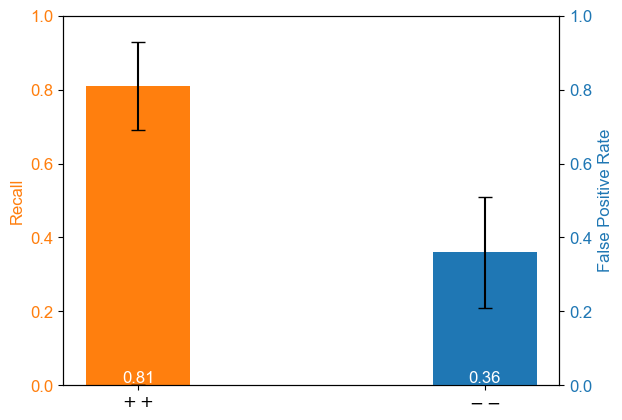

In [7]:
barplot_affinity_prediction()

![My Plot](Figure 2.png)

#### 3. Correlation between model prediction and BFE changes

In [15]:
def scatter_correlacao():
    
   # Read the CSV file and handle data conversion
    data = pd.read_csv(base_dir + 'data2.csv', delimiter=';')
    columns_to_convert = ['BFE', 'BFE_norm', 'Recall']
    data[columns_to_convert] = data[columns_to_convert].apply(lambda x: x.str.replace(',', '.').astype(float))

    # Create the scatter plot
    fig = px.scatter(data, x="BFE_norm", y="Recall", text="Mutação", size_max=80, color="Recall",
                     color_continuous_scale="Viridis", labels={'BFE_norm': "ΔΔG<sub>norm</sub> (kcal/mol)", 'Recall': "p\u0304"},
                     trendline="ols", trendline_color_override="lightgrey", template="simple_white")

    # Duplicate the scatter plot and adjust labels
    fig2 = px.scatter(data, x="BFE_norm", y="Recall", text="Mutação", size_max=80, color="Recall",
                      color_continuous_scale="Viridis", labels={'BFE_norm': "BFE Changes (kcal/mol)"},
                      trendline="ols", trendline_color_override="lightgrey")

    # Add the second plot to the first one
    fig.add_trace(fig2.data[0])
    
    font_color = 'rgb(60, 60, 60)'

    # Customize trace properties
    fig.update_traces(textposition='top right', marker_size=12, line_width=1, textfont=dict(family="Arial", size=20), textfont_color=font_color)
    
    # Customize layout
    fig.update_layout(
        title=dict(y=0.95, x=0.5, xanchor='center', yanchor='top'),
        coloraxis_colorbar=dict(
            title="p\u0304",
            tickfont=dict(family='Arial', size=22),
            title_font_color=font_color
        ),
        xaxis=dict(range=[-0.05, 1.2]),
        xaxis_title_font=dict(family="Arial", size=22),
        yaxis_title_font=dict(family="Arial", size=26),
    )
    
    fig.update_xaxes(tickfont_family="Arial", tickfont_size=22, color=font_color)
    fig.update_yaxes(tickfont_family="Arial", tickfont_size=22, color=font_color)

    # Show the plot
    fig.show()

In [16]:
scatter_correlacao()

#### 4.  Projection of the high-intensity pixels of the feature map onto the 3D structure of the RBD

In [10]:
def calculate_vertical_mean(image_path):
    
    # Load the feature map and convert to grayscale
    image = Image.open(image_path)

    # Convert the image to a NumPy array
    image_array = np.array(image)

    return image_array

In [ ]:
image_path = base_dir+'p1_c0.jpg'
image_array = calculate_vertical_mean(image_path)

i = 1
j = 0
k = 333
num_residues = 194

for j in range(num_residues):
    print("Resíduo: ",i, ((np.max(image_array[0:i,j,:], axis=0).astype(float))))
    i=i+1
    k=k+1

#### 5. Model reliability estimation

In [10]:
def estimated_probs():
    
    data = pd.read_csv(base_dir+'data3.csv', delimiter=',')
    
    data.sort_values('Probs')
    
    data_neutral = (data.iloc[0:5000]).query("Predictions == 'neutra'").sort_values('Probs')
    
    data_positive = (data.iloc[5001:10001]).query("Predictions == 'positiva'").sort_values('Probs')
    
    data_appended = pd.concat([data_neutral, data_positive], axis=0)
    
    fig = px.line(data_appended, x=range(len(data_appended)), y=data_appended["Probs"],
             labels={'Probs':'<b>Estimated a Posterior Probabilities</b>','x':'<b>MD trajectories frames</b>'})
    
    fig.update_layout(
            title={
                'y':0.95,
                'x':0.5,
                'xanchor': 'center',
                'yanchor': 'top'},
            xaxis=dict(range=[0,10002]))
    
    fig.update_xaxes(tickfont_family="Arial Black")
    fig.update_yaxes(tickfont_family="Arial Black")

    fig.show()

In [13]:
estimated_probs()